# DSy162 gDNA

Question: Is the "correct" tRNA neochr in strain DSy162 

Deep gDNA sequencing of strain DSy162. Combined data from two experiments. First sequencing of 12 strains together MiSeq, paired end 250 bp. In second round, DFy162 sequenced alone on MiSeq with 250 bp PE reads

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle code on/off."></form>


In [17]:
from IPython.core.display import HTML
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from importlib.machinery import SourceFileLoader
import sys, os
import site
# add conda packages path
sys.path.append("/g/steinmetz/brooks/anaconda/envs/nanopore/lib/python3.6/site-packages/")
site.addsitedir("/g/steinmetz/brooks/anaconda/envs/nanopore/lib/python3.6/site-packages/")
sys.path.insert(0,"/g/steinmetz/brooks/git/pyGenomeTracks/")
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from multiprocessing import Pool

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

## Chr coverage

First thing to note is that coverage on the neochr is way lower than on other chromosomes. This suggests to me that there may be a bias against purifying the neochr? 

This afffect lowers effective coverage. While other chrs are covered >>100X-1000X, neochr is only average 80X

In [2]:
%%bash
cat /g/steinmetz/project/IESY/sequencing/Results/Illumina/trna_neochr/gdna/DSy162_04192018/results/alignment/DSy162_stats.txt

Sample: DSy162
Alignment file: /g/steinmetz/project/IESY/sequencing/Results/Illumina/trna_neochr/gdna/DSy162_04192018/results/alignment/DSy162_dedup_rg_recal.bam

32144342 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
20192 + 0 supplementary
476773 + 0 duplicates
32104516 + 0 mapped (99.88% : N/A)
32124150 + 0 paired in sequencing
16062075 + 0 read1
16062075 + 0 read2
31996484 + 0 properly paired (99.60% : N/A)
32059824 + 0 with itself and mate mapped
24500 + 0 singletons (0.08% : N/A)
37084 + 0 with mate mapped to a different chr
26288 + 0 with mate mapped to a different chr (mapQ>=5)

reference_sequence_name sequence_length mapped_reads unmapped_reads
2-micron	6318	12850	10
chr01	230222	726548	522
chr02	813185	2083130	1544
chr03	305936	926042	717
chr04	1531932	2978024	2217
chr05	575777	1632072	1247
chr06	270161	837887	621
chr07	1090940	2573318	2052
chr08	562641	1648471	1217
chr09	439891	1291378	993
chr10	745751	1967960	1585
chr11	666818	1792090	1391
chr12	1075778	3

## Structural variants (only for neochr)

Called with Delly

In [3]:
%%bash
grep "^Neochr" \
/g/steinmetz/project/IESY/sequencing/Results/Illumina/trna_neochr/gdna/DSy162_04192018/results/delly/merge/vcf/*.vcf \
| cut -f 1,2,3,4,5,6,7

/g/steinmetz/project/IESY/sequencing/Results/Illumina/trna_neochr/gdna/DSy162_04192018/results/delly/merge/vcf/BND.vcf:Neochr	1	BND00000036	T	]pRS415:155]T	.	LowQual


A tiny bit of evidence (13 reads with low mapping quality) for translocation between neochr and pRS415. I don't believe it.

## Small variants (only for neochr)

Called with GATK

In [4]:
%%bash
grep "Neochr" \
/g/steinmetz/project/IESY/sequencing/Results/Illumina/trna_neochr/gdna/DSy162_04192018/results/vcf/trna_neo_snp.vcf \
| cut -f1,2,3,4,5,6,7

##contig=<ID=Neochr,length=186802>
Neochr	117	.	C	G	966	.
Neochr	372	.	C	CA	1115.97	.
Neochr	828	.	C	G	1782	.
Neochr	829	.	T	G	1782	.
Neochr	832	.	C	CCGT	1715.97	.
Neochr	1432	.	A	G	2014	.
Neochr	1878	.	TCGCG	T	1081.97	.
Neochr	2204	.	TA	T	2054.97	.
Neochr	38794	.	TA	T	2352.97	.
Neochr	145723	.	T	C	3248	.
Neochr	145845	.	T	TA	2471.97	.
Neochr	145984	.	T	G	4050	.
Neochr	145985	.	A	C	4050	.
Neochr	164709	.	TA	T	1213.97	.
Neochr	167187	.	C	A	2252	.
Neochr	177636	.	G	C	2183	.
Neochr	178245	.	G	C	1625	.
Neochr	179537	.	T	A	3001	.
Neochr	180793	.	T	A	1934	.
Neochr	184122	.	G	C	1366	.
Neochr	184169	.	G	C	1194	.


A number of SNPs. I think most of these are real (high quality) relative to designed sequence. 

## Read Coverage

Some weird areas wrt read coverage. It drops off in a couple of areas. 

Most are small deletions @ 1878, 2204, 164709. These are reported above too.

Some others would be consistent with chr break points. I'm think that the circular neochr is being linearized preferentially in some places before sequencing. Is this possible? i.e. fragile points.

In [5]:
f = "/g/steinmetz/project/IESY/sequencing/Results/Illumina/trna_neochr/gdna/DSy162_04192018/results/bed/DSy162_dedup_rg_recal.bedgraph"
bed = pd.DataFrame.from_csv(f,header=None,sep="\t")

/root/anaconda3/envs/jupyter/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


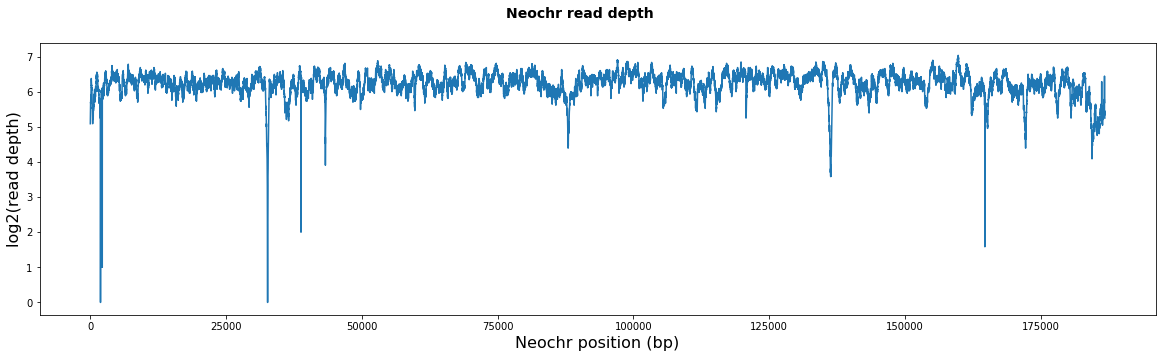

In [6]:
fig = plt.figure(figsize=(20, 5))
fig.suptitle('Neochr read depth', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel("Neochr position (bp)",**font)
ax.set_ylabel("log2(read depth)", **font)
ax.plot(list(bed.loc["Neochr"][1]), np.log2(np.array(bed.loc["Neochr"][3])), data=None)

Here are some IGV screen shoots from the affected areas and ranges with coverage < 10

In [12]:
neochr_cov = bed.loc["Neochr"].sort_values(3)
neochr_cov.loc[neochr_cov[3]<=10]

,1,2,3
0,,,
Neochr,1878,1882,1
Neochr,32645,32648,1
Neochr,32640,32645,2
Neochr,32648,32651,2
Neochr,2204,2205,2
Neochr,32636,32640,3
Neochr,164709,164710,3
Neochr,32651,32663,3
Neochr,38794,38795,4


In [19]:
HTML("<img src='../data/neochr1.png', style='width: 800px;'/>")

In [20]:
HTML("<img src='../data/neochr2.png', style='width: 800px;'/>")

In [21]:
HTML("<img src='../data/neochr3.png', style='width: 800px;'/>")

Strange, huh? What do you think?